# Чтение

In [15]:
%matplotlib inline

In [1]:
fin_train = open('train.in', 'r')
train_set = set()
nodes = set()
for line in fin_train:
    line = line.strip()
    u, w = line.split()
    train_set.add(line)
    nodes.add(int(u))
    nodes.add(int(w))
fin_train.close()

In [2]:
from graph_tool.all import *

In [3]:
g = Graph(directed=False)

In [4]:
g.add_vertex(max(nodes) + 1)

<generator object <genexpr> at 0x7f0a4c229c80>

In [5]:
for edge in train_set:
    u, w = map(int, edge.split())
    g.add_edge(g.vertex(u), g.vertex(w))

In [7]:
comp, hist = label_components(g)

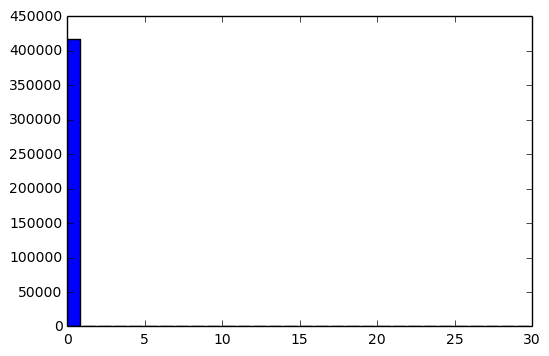

In [76]:
import matplotlib.pyplot as plt
plt.bar(range(0, 30), hist[0:30])
plt.show()

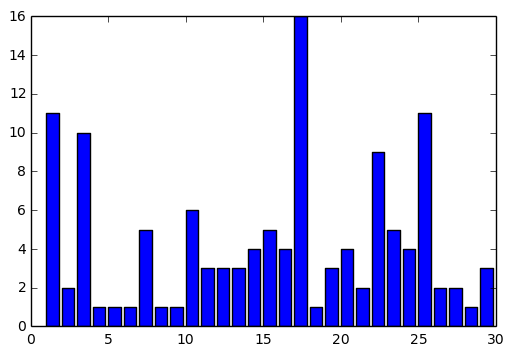

In [77]:
import matplotlib.pyplot as plt
plt.bar(range(1, 30), hist[1:30])
plt.show()

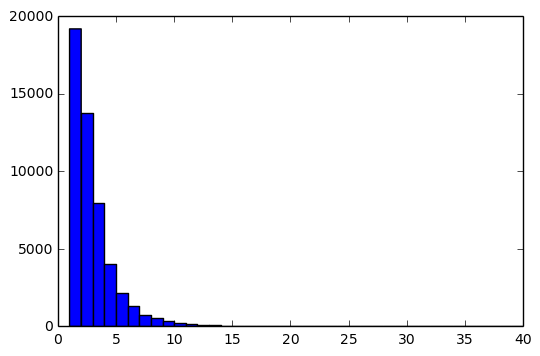

In [82]:
import matplotlib.pyplot as plt
plt.hist(hist[1:], bins=range(1, max(hist[1:])))
plt.show()

In [93]:
# Percent vertexes in large small components
sum([ x for x in hist[1:] if x < 10]) / sum(hist[1:])

0.90985926354347402

In [94]:
# Number vartexes in small
print sum(hist[1:])
# Max small comp
print max(hist[1:])

129675.0
43


In [20]:
hist[0] / sum(hist[:])

0.7626282503043228

In [37]:
comp

<PropertyMap object with key type 'Vertex' and value type 'int32_t', for Graph 0x7f0a4c1c49d0, at 0x7f0a0410abd0>

In [110]:
fin_test = open('test.out', 'r')
test_set = set()
for line in fin_test:
    line = line.strip()
    u, w = line.split()
    if (u + ' ' + w not in train_set) and (
        w + ' ' + u not in train_set):
        test_set.add(line)
fin_test.close()

In [111]:
in_main = 0
between = 0
in_small = 0

for edge in test_set:
    u, w = map(int, edge.split())
    if comp[g.vertex(u)] == comp[g.vertex(w)]:
        if comp[g.vertex(u)] == 0:
            in_main += 1
        else:
            in_small += 1
    else:
        between += 1

In [112]:
in_main, between, in_small

(130365, 12769, 223)

In [113]:
1.0 * between / (in_main + between + in_small)

0.08907133938349715

In [114]:
between_smalls = 0
to_main = 0
with_one = 0
with_two = 0

for edge in test_set:
    u, w = map(int, edge.split())
    if comp[g.vertex(u)] != comp[g.vertex(w)]:
        if comp[g.vertex(u)] == 0 or comp[g.vertex(w)] == 0:
            to_main += 1
        else:
            between_smalls += 1
        if hist[comp[g.vertex(u)]] == 1:
            with_one += 1
        if hist[comp[g.vertex(w)]] == 1:
            with_one += 1
        if hist[comp[g.vertex(u)]] == 2:
            with_two += 1
        if hist[comp[g.vertex(w)]] == 2:
            with_two += 1    

In [60]:
between_smalls, to_main, with_one, with_two

(950, 11819, 2201, 2787)

In [117]:
1.0 * between_smalls / ( between_smalls + to_main)

0.07439893492051061

# Between analys

In [142]:
degrees = []
degrees_main = []
sizes = []

for edge in test_set:
    u, w = map(int, edge.split())
    if comp[g.vertex(u)] != comp[g.vertex(w)]:
        if comp[g.vertex(u)] == 0:
            degrees.append( g.vertex(w).out_degree())
            degrees_main.append( g.vertex(u).out_degree())
        if comp[g.vertex(w)] == 0:
            degrees.append( g.vertex(u).out_degree())
            degrees_main.append( g.vertex(w).out_degree())
            
        if comp[g.vertex(u)] == 0:
            sizes.append( hist[comp[g.vertex(w)]])
        if comp[g.vertex(w)] == 0:
            sizes.append( hist[comp[g.vertex(u)]])

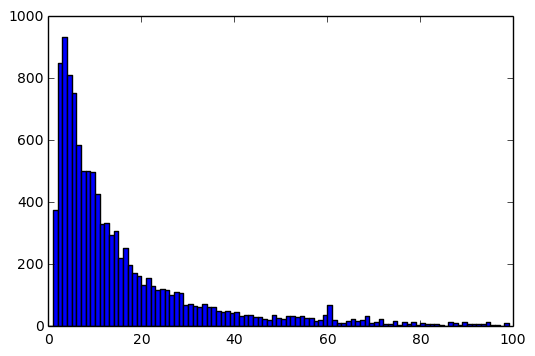

In [145]:
import matplotlib.pyplot as plt
plt.hist(degrees_main, bins=range(0, 100))
plt.show()

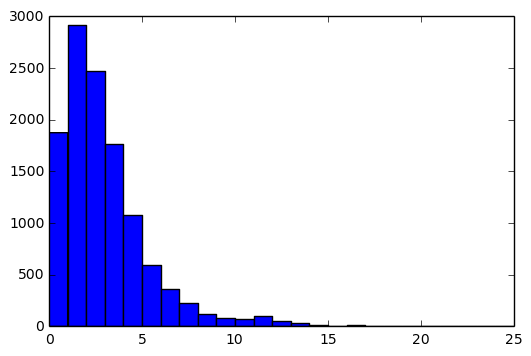

In [119]:
import matplotlib.pyplot as plt
plt.hist(degrees, bins=range(0, 30))
plt.show()

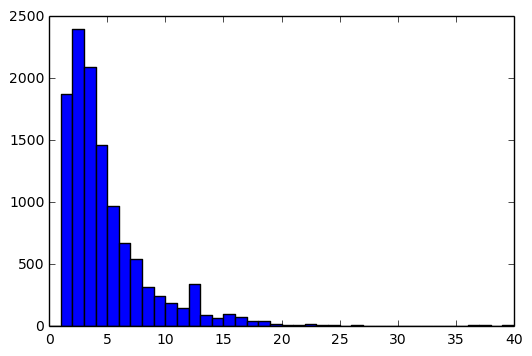

In [120]:
import matplotlib.pyplot as plt
plt.hist(sizes, bins=range(0, 43))
plt.show()

In [121]:
# Percent small components to main
1.0 * sum([ 1 for x in sizes if x < 4]) / len(sizes)

0.5387088586174803

In [122]:
# Percent small components to main
1.0 * sum([ 1 for x in sizes if x < 4]) / sum([ 1 for x in hist if x < 4])

0.15562671098944075

# In small analys

In [151]:
degrees = []
sizes = []

for edge in test_set:
    u, w = map(int, edge.split())
    if comp[g.vertex(u)] == comp[g.vertex(w)] and  comp[g.vertex(w)] != 0:
        degrees.append( g.vertex(w).out_degree())
        degrees.append( g.vertex(u).out_degree())
        sizes.append( hist[comp[g.vertex(w)]])
        sizes.append( hist[comp[g.vertex(u)]])

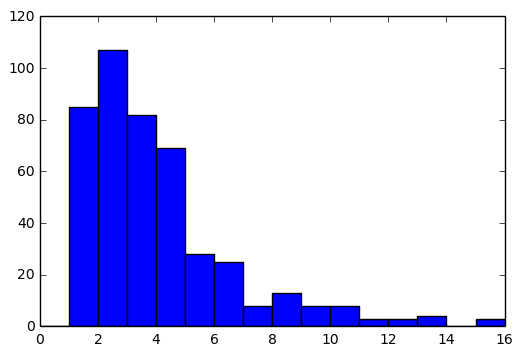

In [152]:
import matplotlib.pyplot as plt
plt.hist(degrees, bins=range(0, 30))
plt.show()

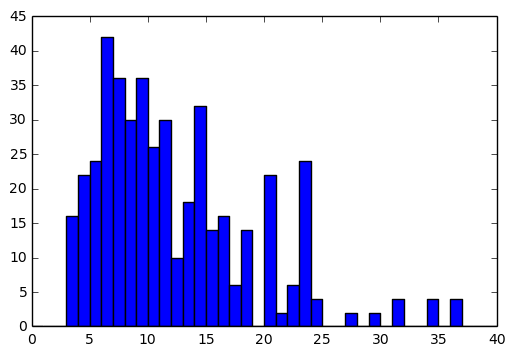

In [153]:
import matplotlib.pyplot as plt
plt.hist(sizes, bins=range(0, 43))
plt.show()

In [154]:
1.0 * sum([ 1 for x in sizes]) / sum([ 1 for x in hist])

0.008756773737532397

In [157]:
1.0 * sum([ 1 for x in sizes if x > 15]) / sum([ 1 for x in hist if x > 15])

0.6626506024096386

In [163]:
1.0 * sum([ 1 for x in sizes if x < 5]) / sum([ 1 for x in hist if x < 5])

0.0008457224249977744

In [162]:
1.0 * sum([ 1 for x in sizes if x < 5]) / sum([ 1 for x in sizes])

0.08520179372197309